In [1]:
import numpy as np
import matplotlib.pyplot as plt

# w - array
def f(t, w):
    x = w[0]
    y = w[1]
    z = w[2]
    u = w[3]
    return np.array([z, u, -x/pow(x**2 + y**2, 3/2), -y/pow(x**2 + y**2, 3/2)])

# Уравнение
$x^\prime = z$  
$y^\prime = u$  
$z^\prime = - \frac{x}{(x^{2} + y^{2})^{3/2}}$  
$u^\prime = - \frac{y}{(x^{2} + y^{2})^{3/2}}$   
$x(0) = 0,5; y(0) = z(0) = 0; u(0) = \sqrt{3}$  
$0 < t \leq 20$
 
Для решения будем использовать явный метод Рунге-Кутты 4 порядка и метод Адамса 4 порядка
## Метод Рунге-Кутты
Общая формула: $\overrightarrow{w_{n+1}} = \overrightarrow{w_{n}} + h\sum\limits_{i=1}^nb_{i}\overrightarrow{k_{i}}$,    
где $w$ - вектор неизвестных, $k_{i} = f(x_{n} + c_{i}h, w_{n} + h\sum\limits_{i=1}^{s_{i}}a_{ij}k_{j})$
Коэфициенты $a, b, c$ опредялются таблицей Бутчера:

|$c_{1}$|$a_{11}$|$a_{12}$|$\ldots$|$a_{1s}$|
|----------|----------|----------|----------|----------|
|$c_{1}$|$a_{21}$|$a_{22}$|$\ldots$|$a_{2s}$|
|$\ldots$|$\ldots$|$\ldots$|$\ldots$|$\ldots$|
|$c_{s}$|$a_{s1}$|$a_{s2}$|$\ldots$|$a_{ss}$|
||$b_{1}$|$b_{2}$|$\ldots$|$b_{s}$|
Будем использовать классический метод:

|$0$|$0$|$0$|$0$|$0$|
|----------|----------|----------|----------|----------|
|$\frac{1}{2}$|$\frac{1}{2}$|$0$|$0$|$0$|
|$\frac{1}{2}$|$0$|$\frac{1}{2}$|$0$|$0$|
|$1$|$0$|$0$|$1$|$0$|
||$\frac{1}{6}$|$\frac{2}{6}$|$\frac{2}{6}$|$\frac{1}{6}$|
Таким образом, формулы имеют вид:

$w_{n+1} = w_{n} + h\frac{k_1 + 2k_2 + 2k_3 + k_4}{6}$  
$k_1 = f(t_n, w_n)$  
$k_2 = f(t_n + \frac{h}{2}, w_n + \frac{hk_1}{2})$  
$k_3 = f(t_n + \frac{h}{2}, w_n + \frac{hk_2}{2})$   
$k_4 = f(t_n + h, w_n + hk_3)$

In [2]:
def runge_kutta(f, h, t0, tn, w0):

    # Define the number of steps
    n = int((tn - t0) / h)

    # Initialize arrays for t and w
    t = np.zeros(n+1)
    w = np.zeros((n+1, 4))

    t[0] = t0
    w[0] = w0

    for i in range(n):
        k1 = f(t[i], w[i])
        k2 = f(t[i] + h/2, w[i] + h * k1/2)
        k3 = f(t[i] + h/2, w[i] + h * k2/2)
        k4 = f(t[i] + h, w[i] + h * k3)
        w[i+1] = w[i] + h * (k1 + 2* k2 + 2*k3 + k4) / 6
        t[i+1] = t[i] + h

    return t, w

Взглянем на результаты:

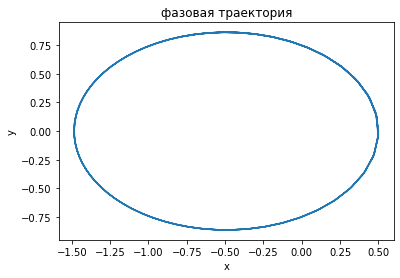

In [3]:
h = 0.1
w0 = np.array([0.5 , 0, 0, 1.73])
t0 = 0
tn = 20

t, w  = runge_kutta(f, h, t0, tn, w0)
x, y, z, u = map(np.array, zip(*w))

plt.plot(x, y)
plt.title('фазовая траектория')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

По мере увеличения h начинается "расколбас"

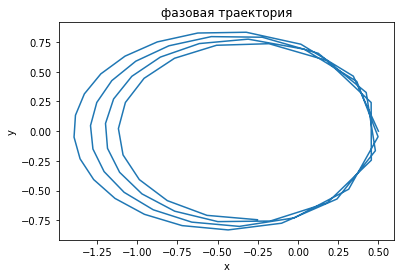

In [4]:
h = 0.3
w0 = np.array([0.5 , 0, 0, 1.73])
t0 = 0
tn = 20

t, w  = runge_kutta(f, h, t0, tn, w0)
x, y, z, u = map(np.array, zip(*w))

plt.plot(x, y)
plt.title('фазовая траектория')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Метод Адамса 4-го порядка
$$w_{n+4} = w_{n+3} + h \left(\frac{55}{24} f(t_{n+3}, w_{n+3}) - \frac{59}{24} f(t_{n+2}, w_{n+2}) + \frac{37}{24} f(t_{n+1}, w_{n+1}) - \frac{3}{8} f(t_{n}, w_{n}) \right)$$

Будем вычислять значения в первых 3-х узлах используя Метод Рунге-Кутта  

In [5]:
def addams(f, h, t0, tn, w0):
    n = int((tn - t0) / h)

    t = np.zeros(n+1)
    w = np.zeros((n+1, 4))

    if n < 3:
        raise Exception("must be at least 4 points")
    
    _ ,addams_init = runge_kutta(f, h, t0, t0 +3*h, w0)
 
    for i in range(len(addams_init)):
        w[i] = addams_init[i]

    for i in range(n-3):
        w[i+4] = w[i+3] + h * (55/24*f(t[i+3], w[i+3]) - 59/24*f(t[i+2], w[i+2]) + 37/24*f(t[i+1], w[i+1]) - 3/8*f(t[i], w[i]))
        t[i+4] = t[i+3] + h

    return t, w

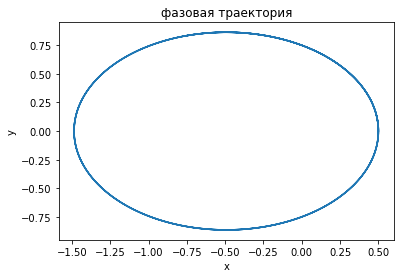

In [6]:
h = 0.01
w0 = np.array([0.5 , 0, 0, 1.73])
t0 = 0
tn = 20

t, w  = addams(f, h, t0, tn, w0)

x, y, z, u = map(np.array, zip(*w))

plt.plot(x, y)
plt.title('фазовая траектория')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Как и ожидали, мы получили эллиптическую траекторию в обоих случаях.